This notebooks takes the profile files produced by the [profile](https://neutronimaging.ornl.gov/tutorials/imaging-notebooks/profile/linear-profile/) notebook.

<img src='static/screenshot_of_profile_file.png' />


In [124]:
import os
import pandas as pd
import numpy as np
import lmfit

import matplotlib.pyplot as plt
%matplotlib notebook

Define the **base folder (base_folder)** from where all the data set will be located. 

For example, if you are working on the analysis machine:

*base_folder = "/SNS/VENUS/IPTS-31716/shared/NC_images/2023-06-12"*


In [74]:
base_folder = "/Users/j35/SNS/VENUS/IPTS-31716-first_experiment_ever/profiles/"
assert os.path.exists(base_folder)  # making sure the base folder exists

## working with various apertures 

In [103]:
profile_file = os.path.join(base_folder, 'IPTS-31716-first_experiment_ever_profile_3.txt')
assert os.path.join(profile_file)

In [104]:
pd_object = pd.read_csv(profile_file, skiprows=13)

In [105]:
pd_object

,##y_axis,# col.1,# col.2,# col.3,# col.4,# col.5,# col.6
0,822,6710.6665,1511.1666,930.8333,588.50000,14569.000,3226.0000
1,823,6661.5000,1659.5000,1025.0000,594.66670,14506.333,3313.3333
2,824,6502.5000,1635.5000,903.6667,541.33330,14845.333,3164.1667
3,825,6882.5000,1618.8334,922.3333,547.66670,14656.667,3391.5000
4,826,6672.8335,1586.5000,931.0000,651.66670,14921.667,3367.5000
...,...,...,...,...,...,...,...
4839,5661,5056.5000,1204.6666,635.8333,382.50000,11472.167,2558.3333
4840,5662,5173.6665,1138.8334,681.8333,376.83334,11497.333,2545.5000
4841,5663,4946.1665,1245.5000,681.3333,406.83334,11837.167,2572.5000
4842,5664,5184.6665,1157.1666,630.1667,389.50000,11781.500,2551.3333


## retrieve information about names of columns

In [106]:
print(pd_header)

                            #List of files (6 files)
0  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...
1  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...
2  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...
3  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...
4  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...
5  # * /Users/j35/SNS/VENUS/IPTS-31716-first_expe...


In [107]:
pd_header = pd.read_csv(profile_file, skiprows=5, nrows=6)
list_columns = pd_header.columns.values.tolist()

In [108]:
list_files = list(pd_header.loc[:, list_columns[0]])

column_file_name_dict = {}
for _index_column, _line in enumerate(list_files):
    _line_no_space = _line.replace(" ", "")
    file_name, col_name = _line_no_space.split("->")
    various_part_of_file_name = file_name.split("/")
    column_file_name_dict[_index_column] = various_part_of_file_name[-1]
    

In [109]:
column_file_name_dict

{0: '0deg_nbr2_30s_frames_OB.tif',
 1: '120deg_nbr2_30s_frames_OB.tif',
 2: '180deg_nbr2_30s_frames_OB.tif',
 3: '240deg_nbr2_30s_frames_OB.tif',
 4: '300deg_nbr1_30s_frames_OB.tif',
 5: '60deg_nbr2_30s_frames_OB_median.tif'}

## group the profiles data and names of the files 

In [110]:
def extract_aperture_angle(file_name):
    list_file_name_parts = file_name.split("_")
    return list_file_name_parts[0]

In [115]:
list_columns_data = pd_object.columns.values.tolist()

x_axis = list(pd_object.loc[:, list_columns_data[0]])

profile_dict = {}
for _index, _name_column in enumerate(list_columns_data[1:]):
    _profile = np.asarray(pd_object.loc[:, _name_column])
    aperture_wheel_angle = extract_aperture_angle(column_file_name_dict[_index])
    profile_dict[aperture_wheel_angle] = {'profile': _profile,
                                          'file name': column_file_name_dict[_index]
                                          }

<IPython.core.display.Javascript object>


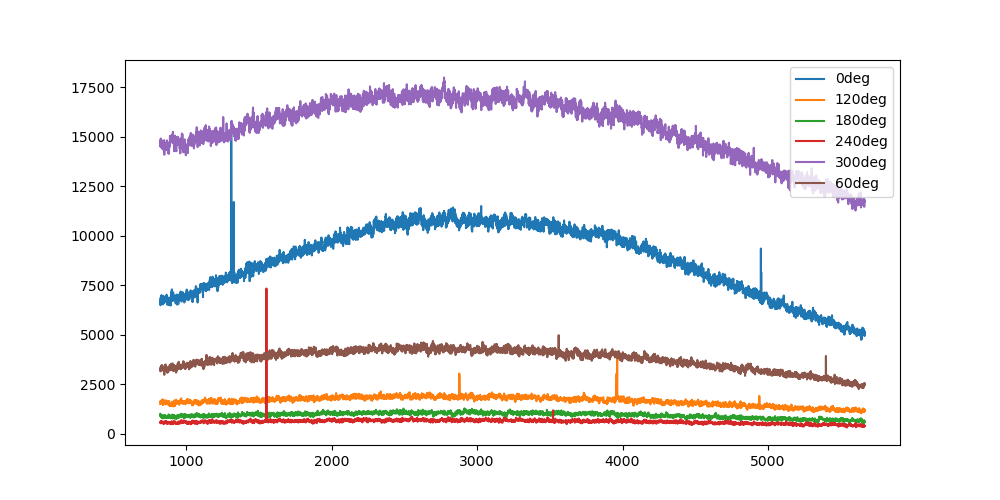

In [116]:
plt.figure(figsize=(10,5))

for _key in profile_dict.keys():
    _profile = profile_dict[_key]['profile']
    plt.plot(x_axis, _profile, label=_key)
    
# plt.yscale("log")
plt.legend()

## Let's fit the profile of the 300deg data set

In [122]:
image_width = 9576
image_height = 6388
print(f"{image_height/2 =}")

image_height / 2 =3194.0


<IPython.core.display.Javascript object>


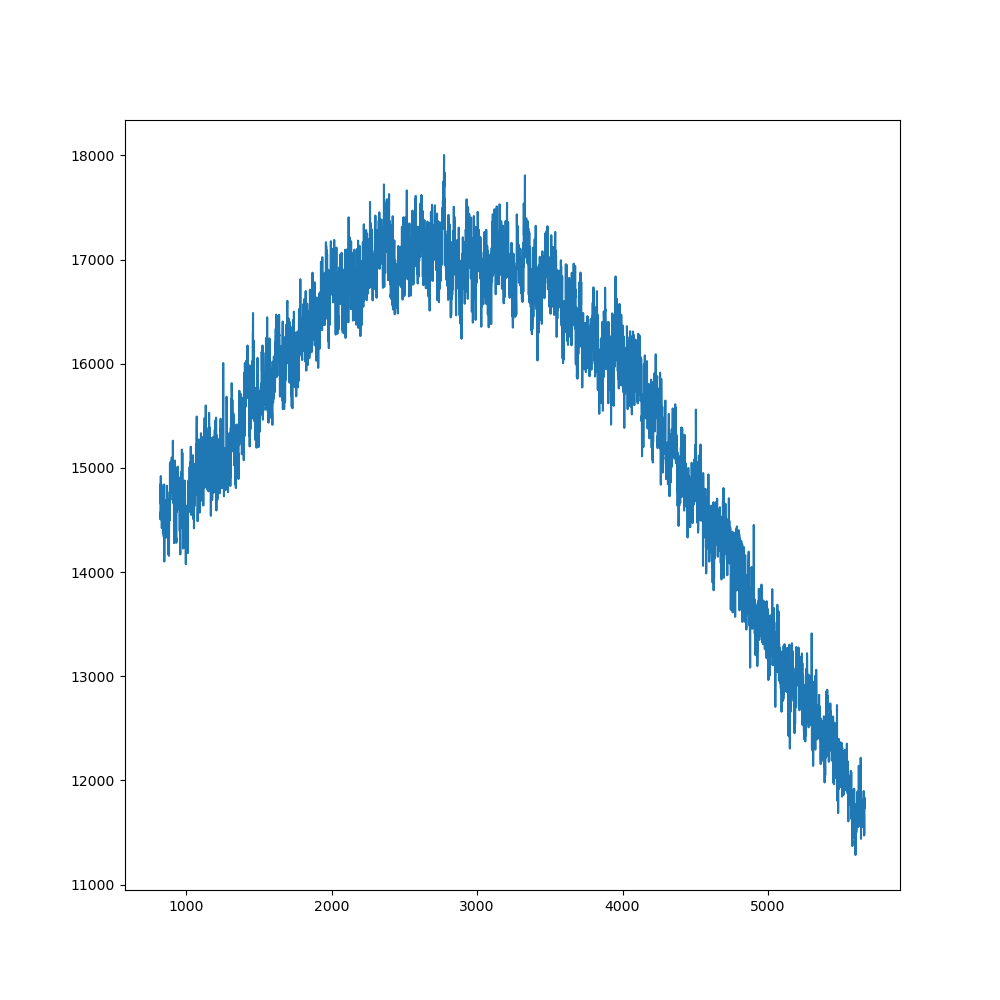

In [119]:
plt.figure(figsize=(10,10))
data_300deg = profile_dict['300deg']['profile']
plt.plot(x_axis, data_300deg)

In [123]:
# def gaussian(x, mu, sig):
#     return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [125]:
mod = lmfit.models.GaussianModel() + lmfit.models.ConstantModel()

In [128]:
x_axis = np.array(x_axis)
pars = mod.make_params(c=data_300deg.mean(),
                      center=3000,
                      sigma=x_axis.std(),
                      amplitude=x_axis.std() * data_300deg.ptp())

In [131]:
out = mod.fit(data_300deg, pars, x=x_axis)

<IPython.core.display.Javascript object>


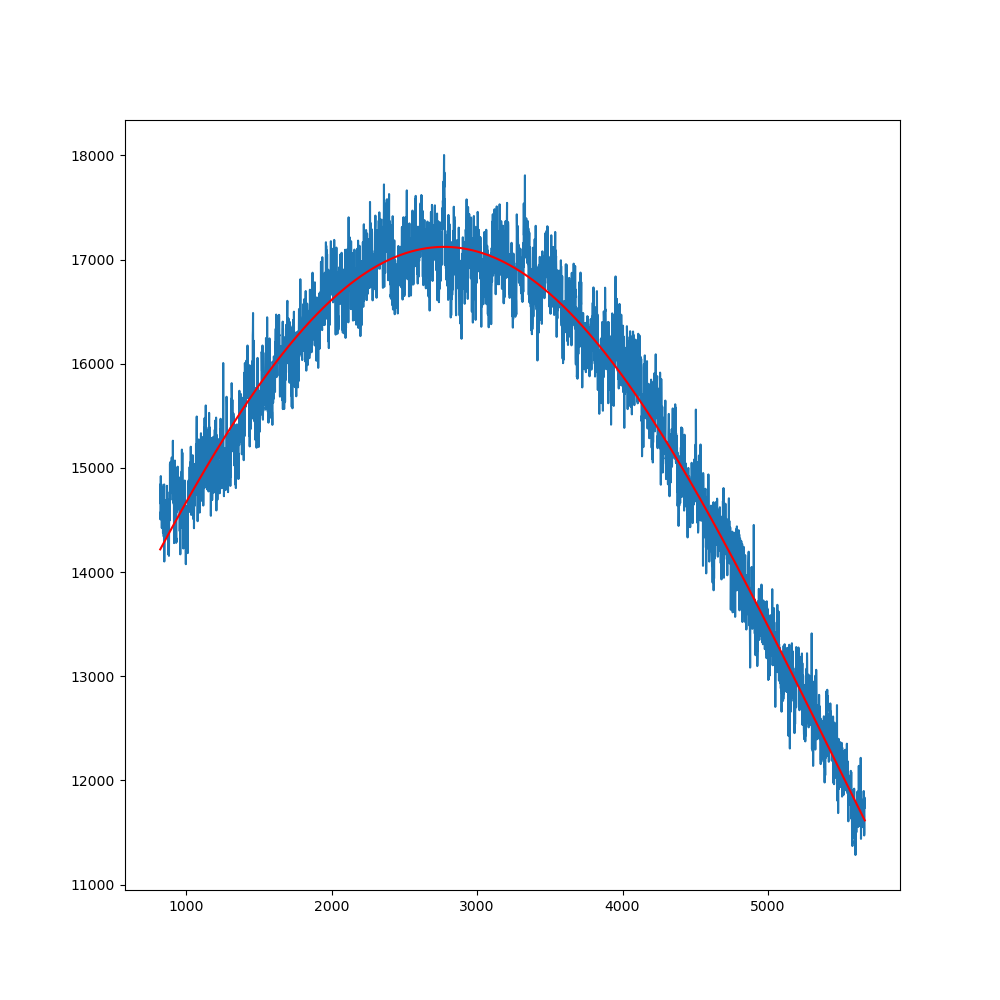

In [134]:
plt.figure(figsize=(10,10))
plt.plot(x_axis, data_300deg)
plt.plot(x_axis, out.best_fit, 'r', label='gaussian model')


In [142]:
# print(out.fit_report())

In [145]:
print(f"Center is : {round(out.params['center'].value)}")

Center is : 2773


## Let's perform the same fitting over all the data set (automatically) 

<IPython.core.display.Javascript object>


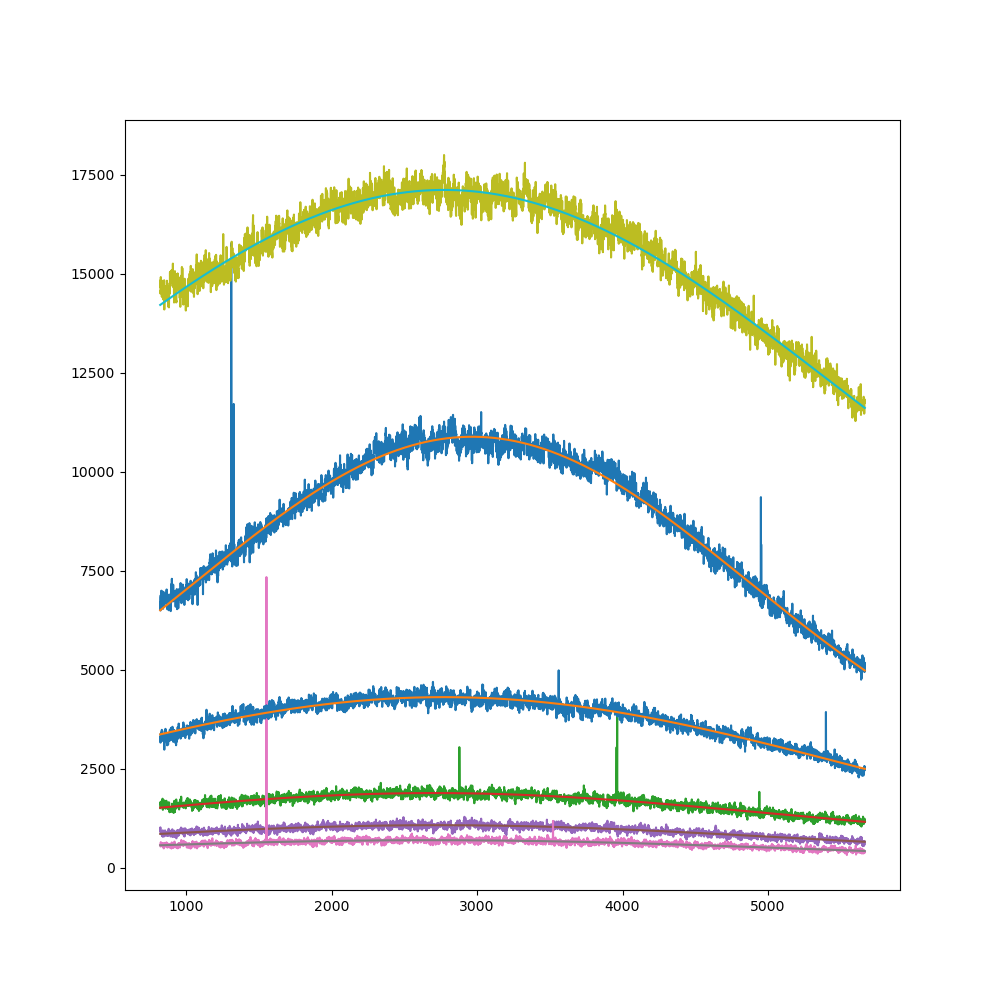

In [151]:
center_dict = {}

plt.figure(figsize=(10,10))

mod = lmfit.models.GaussianModel() + lmfit.models.ConstantModel()

for _key in profile_dict.keys():
    _profile = profile_dict[_key]['profile']
    
    pars = mod.make_params(c=_profile.mean(),
                           center=3000,
                           sigma=x_axis.std(),
                           amplitude=x_axis.std() * _profile.ptp())
    
    out = mod.fit(_profile, pars, x=x_axis)
    
    plt.plot(x_axis, _profile)
    plt.plot(x_axis, out.best_fit, label=_key)
    
    center_dict[_key] = round(out.params['center'].value)
    

<IPython.core.display.Javascript object>


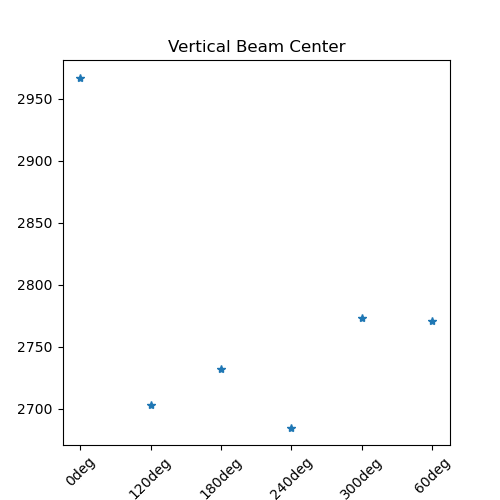

([<matplotlib.axis.XTick at 0x7f841ce3ae50>,
 [Text(0, 0, '0deg'),
  Text(1, 0, '120deg'),
  Text(2, 0, '180deg'),
  Text(3, 0, '240deg'),
  Text(4, 0, '300deg'),
  Text(5, 0, '60deg')])

In [180]:
plt.figure(figsize=(5,5))
labels = list(center_dict.keys())
centers = np.array([center_dict[_key] for _key in center_dict.keys()])
ticks = np.arange(len(labels))

plt.plot(ticks, centers, '*')
plt.title("Vertical Beam Center")
plt.xticks(ticks, labels, rotation=45)